# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  

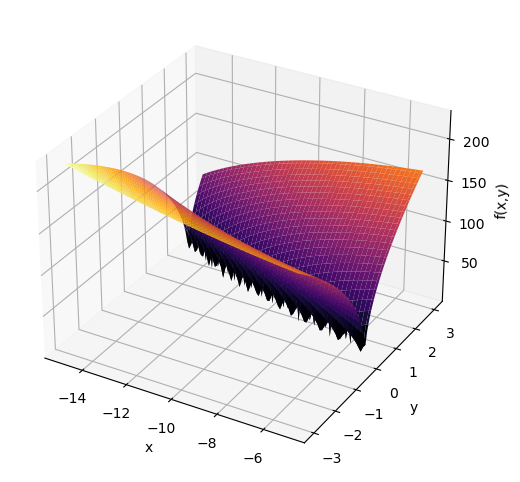

In [112]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    t1 = 100 * np.sqrt(np.abs(y - 0.01 * x**2))
    t2 = 0.01 * np.abs(x + 10)
    return t1 + t2

x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X, Y, Z, cmap='inferno')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
plt.show()

In [108]:
# Ex. 2:
# Write a Hill Climbing algorithm that finds this functions minimum.
# Hints: define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

import random
import math

def get_random_start():
    x = random.uniform(-15, -5)
    y = random.uniform(-3, 3)
    return x, y

def get_neighbors(x, y, step_size):
    neighbors = []
    for dx, dy in [(step_size, 0), (-step_size, 0), (0, step_size), (0, -step_size)]:
        neighbor = (x + dx, y + dy)
        if neighbor[0] >= -15 and neighbor[0] <= -5 and neighbor[1] >= -3 and neighbor[1] <= 3:
            neighbors.append(neighbor)
    return neighbors

def hill_climbing(step_size=0.1):
    current_state = get_random_start()
    best_fitness = f(*current_state)
    while True:
        neighbors = get_neighbors(*current_state, step_size=step_size)
        if not neighbors:
            print("Local minimum found.")
            return current_state, best_fitness
        neighbor_fitnesses = [f(*neighbor) for neighbor in neighbors]
        best_neighbor_fitness = min(neighbor_fitnesses)
        if best_neighbor_fitness < best_fitness:
            best_fitness = best_neighbor_fitness
            current_state = neighbors[neighbor_fitnesses.index(best_neighbor_fitness)]
        else:
            print("Local minimum found.")
            return current_state, best_fitness

print(hill_climbing())

Local minimum found.
((-12.518578669786722, 1.5645715088096748), 5.101218003613149)


In [109]:
# Ex. 3: for 1 point
# Implement a hill climbing algorithm for the knapsack problem.
# Hints: For n elements: we begin with an empty string of n zeros, a neighbour is constructed by switching of zero into an one at a position in the array. Does it find the optimum?

import random

def knapsack_fitness(state, values, weights, capacity):
    total_weight = sum(weights[i] for i in range(len(state)) if state[i])
    if total_weight > capacity:
        return 0
    else:
        return sum(values[i] for i in range(len(state)) if state[i])
    
def knapsack_hill_climbing(values, weights, capacity, max_iterations):
    n = len(values)
    state = [0] * n 
    current_fitness = knapsack_fitness(state, values, weights, capacity)
    
    for i in range(max_iterations):
        neighbor = state.copy()
        index = random.randint(0, n - 1)
        neighbor[index] = 1 - neighbor[index]
        neighbor_fitness = knapsack_fitness(neighbor, values, weights, capacity)
        
        if neighbor_fitness > current_fitness:
            state = neighbor
            current_fitness = neighbor_fitness
    
    return state, current_fitness

n = 20
values = np.array([10, 25, 15, 30, 20])
weights = np.array([5, 10, 8, 15, 12])
capacity = 30
max_iterations = 1000

best_state, best_fitness = knapsack_hill_climbing(values, weights, capacity, max_iterations)
print(best_state, best_fitness)


[1, 1, 0, 0, 1] 55


In [113]:
# Ex. 4: for 1 point
# Improve it to increase the chances of finding the solution.

import random
import numpy as np

def knapsack_fitness(state, values, weights, capacity):
    total_weight = sum(weights[i] for i in range(len(state)) if state[i])
    if total_weight > capacity:
        return 0
    else:
        return sum(values[i] for i in range(len(state)) if state[i])
    
def knapsack_stochastic_hill_climbing(values, weights, capacity, max_iterations):
    n = len(values)
    state = [0] * n  
    current_fitness = knapsack_fitness(state, values, weights, capacity)
    
    for i in range(max_iterations):
        neighbors = []
        for j in range(n):
            neighbor = state.copy()
            neighbor[j] = 1 - neighbor[j]
            neighbors.append(neighbor)
        
        fitnesses = [knapsack_fitness(neighbor, values, weights, capacity) for neighbor in neighbors]
        probabilities = [fitness / sum(fitnesses) for fitness in fitnesses]
        index = np.random.choice(n, p=probabilities)
        
        neighbor_fitness = fitnesses[index]
        if neighbor_fitness > current_fitness:
            state = neighbors[index]
            current_fitness = neighbor_fitness
    
    return state, current_fitness

n = 20
values = np.array([10, 25, 15, 30, 20])
weights = np.array([5, 10, 8, 15, 12])
capacity = 30
max_iterations = 1000

best_state, best_fitness = knapsack_stochastic_hill_climbing(values, weights, capacity, max_iterations)
print(best_state, best_fitness)


[1, 1, 1, 0, 0] 50
